# E-Commerce Project 1: Identify Consumer Profiles

**Primary Task:**

Segment users based on their consumer profiles.


# Project Background

1. Who's the customer? Product manager responsible for user experience
2. Who needs the information? Who is the intended user of the final result? The customers who asked for the analysis
3. What do they want to do? Make personalized offers for users
4. Are we interested in a particular time period, or are we investigating the entire period covered by the source data? The entire period
5. Is the presentation intended for the customer? If not, who will study it? For the customer
6. What made this research necessary? Why this kind of research in particular? Qualitative research isn't enough to make decisions; we need arguments based on data.
7. Has research of this kind been carried out before? No, this is new. Be as explicit as possible when describing how your solution works.

# Analysis Procedures

1. Prepare dataset
2. Data checking and cleansing
3. Exploratory Data Analysis :
    - Revenue trends
    - Average purchase value and its trends
    - Month-to-month trends in average revenue per user
4. Segment users based on their purchase history :
    - What segments tend to make seasonal purchases? Do these users tend to make repeat purchases?
    - What user segments tend to make several orders over a long period of time?
    - What user segments make many purchases over a short period of time?
    - What user segments make big orders? What can you say about their consumption patterns?
5. Formulate and test statistical hypotheses :
    - Formulate and test a hypothesis on differences in average order frequency and size for different user segments. 
        - H0 : average order frequency and size for different user segments are the same
        - H1 : average order frequency and size for different user segments are not the same
    - Formulate a statistical hypothesis regarding the data from the dataset and test it. 
        - H0 : income for different user segments are the same
        - H1 : income for different user segments are not the same
    - the level of significance used is 5% or 0.05
6. Create Presentation and Dashboards:
    - Presentation will include how to decide which segment, what's the difference, and the significance of this study to the stakeholders.
    - What should we do with the information? what's the next step after this? 
7. Conclusion

# Data Description

The dataset contains the transaction history of Everything Plus, an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:
- `InvoiceNo` — order identifier
- `StockCode` — item identifier
- `Description` — item name
- `Quantity`
- `InvoiceDate` — order date
- `UnitPrice` — price per item
- `CustomerID`

# Suggestion for Dashboard

- Plot a diagram for the number of purchases per day
- Add an indicator for the number of customers
- Add a purchase date filter

## Opening and Preparing Data

In [74]:
# import library
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t', error_bad_lines='skip')

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [77]:
df.shape

(541909, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [79]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [80]:
# Remove Error Data
df = df.loc[(df['UnitPrice']>0) & (df['Quantity']>0)]

In [81]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [82]:
# converting to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [83]:
# add month
df['InvoiceMonth'] = df['InvoiceDate'].astype('datetime64[M]')

In [84]:
df.shape

(530104, 8)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  object        
 1   StockCode     530104 non-null  object        
 2   Description   530104 non-null  object        
 3   Quantity      530104 non-null  int64         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   InvoiceMonth  530104 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 36.4+ MB


In [86]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      132220
InvoiceMonth         0
dtype: int64

## Exploratory Data Analysis

### Revenue Trends

In [87]:
# user categorization
user_price = df.groupby(['CustomerID'])['UnitPrice'].mean().reset_index()
user_price

,CustomerID,UnitPrice
0,12346.0,1.040000
1,12347.0,2.644011
2,12348.0,5.764839
3,12349.0,8.289041
4,12350.0,3.841176
...,...,...
4333,18280.0,4.765000
4334,18281.0,5.622857
4335,18282.0,5.199167
4336,18283.0,1.614987


In [88]:
user_quantity = df.groupby(['CustomerID'])['Quantity'].sum().reset_index()
user_quantity

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197
...,...,...
4333,18280.0,45
4334,18281.0,54
4335,18282.0,103
4336,18283.0,1397


In [89]:
# joint for users
users = user_price.merge(user_quantity, on='CustomerID', how='left')
users

,CustomerID,UnitPrice,Quantity
0,12346.0,1.040000,74215
1,12347.0,2.644011,2458
2,12348.0,5.764839,2341
3,12349.0,8.289041,631
4,12350.0,3.841176,197
...,...,...,...
4333,18280.0,4.765000,45
4334,18281.0,5.622857,54
4335,18282.0,5.199167,103
4336,18283.0,1.614987,1397


In [90]:
# calculate revenue
users['revenue'] = users['UnitPrice'] * users['Quantity']
users = users.round(2)
users

,CustomerID,UnitPrice,Quantity,revenue
0,12346.0,1.04,74215,77183.60
1,12347.0,2.64,2458,6498.98
2,12348.0,5.76,2341,13495.49
3,12349.0,8.29,631,5230.38
4,12350.0,3.84,197,756.71
...,...,...,...,...
4333,18280.0,4.77,45,214.43
4334,18281.0,5.62,54,303.63
4335,18282.0,5.20,103,535.51
4336,18283.0,1.61,1397,2256.14


In [91]:
# check for negative revenue
users.loc[users['revenue']<0]

,CustomerID,UnitPrice,Quantity,revenue


In [92]:
users.describe()

,CustomerID,UnitPrice,Quantity,revenue
count,4338.000000,4338.000000,4338.000000,4.338000e+03
mean,15300.408022,4.467699,1191.289073,4.440660e+03
std,1721.808492,34.211454,5046.081546,3.964704e+04
min,12346.000000,0.120000,1.000000,3.750000e+00
25%,13813.250000,2.200000,160.000000,4.748200e+02
50%,15299.500000,2.920000,379.000000,1.094995e+03
75%,16778.750000,3.830000,992.750000,2.779983e+03
max,18287.000000,2033.100000,196915.000000,1.667547e+06


### Average Purchase Value (APV)

In [93]:
# calculate average purchase value (APV)
users['APV'] = users['revenue'] / users['Quantity']
users

,CustomerID,UnitPrice,Quantity,revenue,APV
0,12346.0,1.04,74215,77183.60,1.040000
1,12347.0,2.64,2458,6498.98,2.644011
2,12348.0,5.76,2341,13495.49,5.764840
3,12349.0,8.29,631,5230.38,8.289033
4,12350.0,3.84,197,756.71,3.841168
...,...,...,...,...,...
4333,18280.0,4.77,45,214.43,4.765111
4334,18281.0,5.62,54,303.63,5.622778
4335,18282.0,5.20,103,535.51,5.199126
4336,18283.0,1.61,1397,2256.14,1.614989


The Average Purchase Value measures the average sales value of each sales transaction. This is an important sales KPI(key performance indicator) to understand because it will help develop revenue projections and forecasting.

### Month-to-month trends in average revenue per user

In [94]:
df_plus_users = df.merge(users, on='CustomerID', how='inner')
df_plus_users

,InvoiceNo,StockCode,Description,Quantity_x,InvoiceDate,UnitPrice_x,CustomerID,InvoiceMonth,UnitPrice_y,Quantity_y,revenue,APV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-01,3.96,1733,6863.32,3.960369
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-01,3.96,1733,6863.32,3.960369
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-01,3.96,1733,6863.32,3.960369
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-01,3.96,1733,6863.32,3.960369
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-01,3.96,1733,6863.32,3.960369
...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2019-12-07 12:16:00,1.25,12713.0,2019-12-01,2.50,508,1271.74,2.503425
397880,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2019-12-07 12:16:00,0.85,12713.0,2019-12-01,2.50,508,1271.74,2.503425
397881,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2019-12-07 12:16:00,0.85,12713.0,2019-12-01,2.50,508,1271.74,2.503425
397882,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2019-12-07 12:16:00,2.08,12713.0,2019-12-01,2.50,508,1271.74,2.503425


In [95]:
df_plus_users.pivot_table(index='InvoiceMonth', values='revenue', aggfunc='mean')

,revenue
InvoiceMonth,
2018-11-01,15781.386266
2018-12-01,18805.632404
2019-01-01,21430.092808
2019-02-01,20099.018769
2019-03-01,21451.691727
2019-04-01,15889.219175
2019-05-01,22522.254458
2019-06-01,23717.810056
2019-07-01,20938.972926


<AxesSubplot:xlabel='InvoiceMonth'>

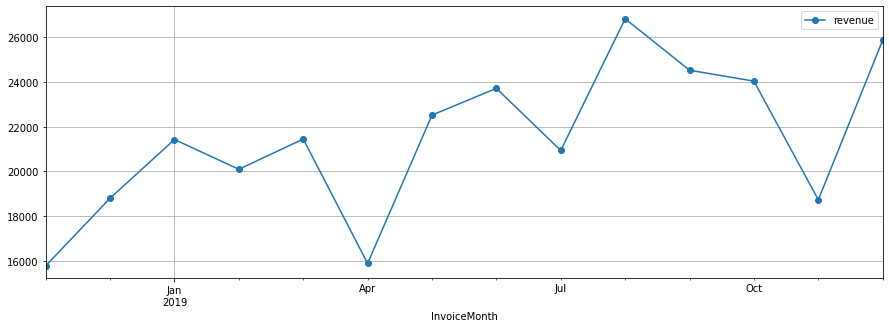

In [96]:
df_plus_users.pivot_table(index='InvoiceMonth', values='revenue', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,5))

**findings:**

- it seems that there's always a dip in `revenue` every few months, most notably in `april`, `july`, and `november`
- eventhough there's up and downs in revenue. at the end of the data, it shows an increase in `revenue` if we compare it to the beginning of the data.

<AxesSubplot:xlabel='InvoiceMonth'>

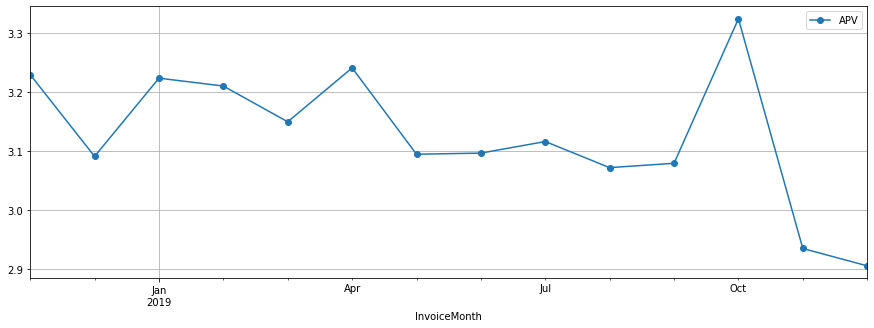

In [97]:
df_plus_users.pivot_table(index='InvoiceMonth', values='APV', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,5))

**findings:** 

- `APV` reached it's peak at october, but then it dipped quite a lot after that. in the `revenue` graph, it also showed a similar pattern.

## Segmenting Users

In [98]:
from sklearn.cluster import KMeans

In [99]:
users[['UnitPrice', 'Quantity']]

,UnitPrice,Quantity
0,1.04,74215
1,2.64,2458
2,5.76,2341
3,8.29,631
4,3.84,197
...,...,...
4333,4.77,45
4334,5.62,54
4335,5.20,103
4336,1.61,1397


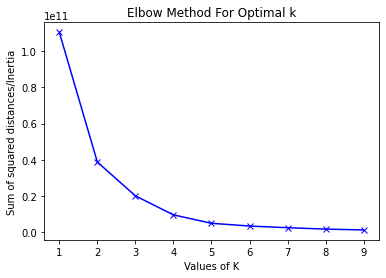

In [100]:
# Search The Best Cluster
X = users[['UnitPrice', 'Quantity']]
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

**Using the elbow method:**

The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of values of k (say 1 to 10) In the elbow method, we plot mean distance and look for the `elbow point` where the rate of decrease shifts.

In the above plot, it's pretty hard to see where is the elbow, one might argue it's between `3` or `4`. let's choose that the elbow is at `3`. so, k=3 (i.e., the Sum of squared distances falls suddenly), indicating the optimal k for this dataset is `3`.

In [101]:
# Retraining with 3 cluster
km = KMeans(n_clusters=3, random_state=10)
km.fit(X)
clusters = km.predict(X)
clusters

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [102]:
# Insert Cluster into Product Dataset
users['Cluster'] = clusters
users

,CustomerID,UnitPrice,Quantity,revenue,APV,Cluster
0,12346.0,1.04,74215,77183.60,1.040000,1
1,12347.0,2.64,2458,6498.98,2.644011,0
2,12348.0,5.76,2341,13495.49,5.764840,0
3,12349.0,8.29,631,5230.38,8.289033,0
4,12350.0,3.84,197,756.71,3.841168,0
...,...,...,...,...,...,...
4333,18280.0,4.77,45,214.43,4.765111,0
4334,18281.0,5.62,54,303.63,5.622778,0
4335,18282.0,5.20,103,535.51,5.199126,0
4336,18283.0,1.61,1397,2256.14,1.614989,0


In [103]:
users['Cluster'].value_counts()

0    4314
1      23
2       1
Name: Cluster, dtype: int64

In [104]:
users.groupby(['Cluster']).mean()

,CustomerID,UnitPrice,Quantity,revenue,APV
Cluster,,,,,
0,15299.973111,4.471145,893.124478,3377.448521,4.471219
1,15410.434783,3.907391,48606.869565,182708.715652,3.907370
2,14646.000000,2.490000,196915.000000,490968.090000,2.493300


**findings:**

- `cluster 2` made the biggest quantity order.
- with the amount of quantity `cluster 2` made, it's no surprise that `cluster 2` also made the most `revenue` out of all clusters
- even though `cluster 2` made huge number in `revenue`. it's difficult to compare it to another cluster because there's only 1 user that belong to `cluster 2`.
- with `cluster 0` having the most user, it's no suprise that it will affect some of the numbers. `cluster 0` might have the lowest in `revenue` but it also has the highest in `APV`. so , to abandon or underestimate the effects those in `cluster 0` might not be the wisest choice. 

In [105]:
mean_users = users.groupby(['Cluster']).mean()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


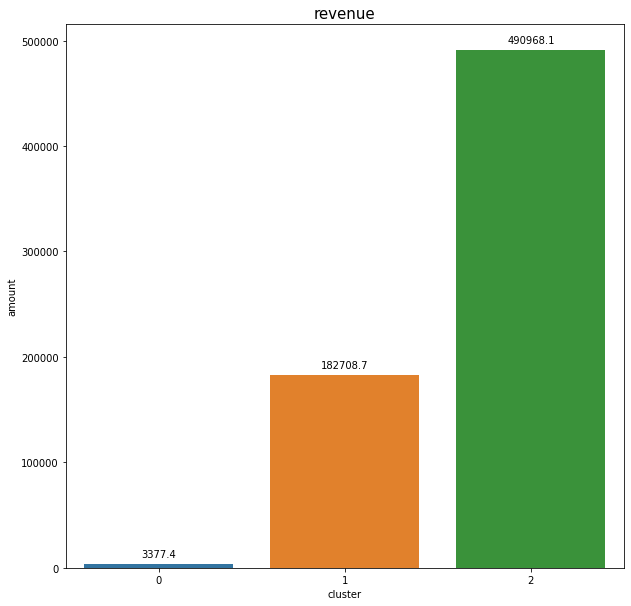

In [106]:
plt.figure(figsize=(10, 10))
mean_users_barplot = sns.barplot(mean_users.index, mean_users['revenue'])

for bar in mean_users_barplot.patches:
    mean_users_barplot.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0,
                   textcoords = 'offset points')

plt.xlabel('cluster')
plt.ylabel('amount')
plt.title('revenue', fontsize=15)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


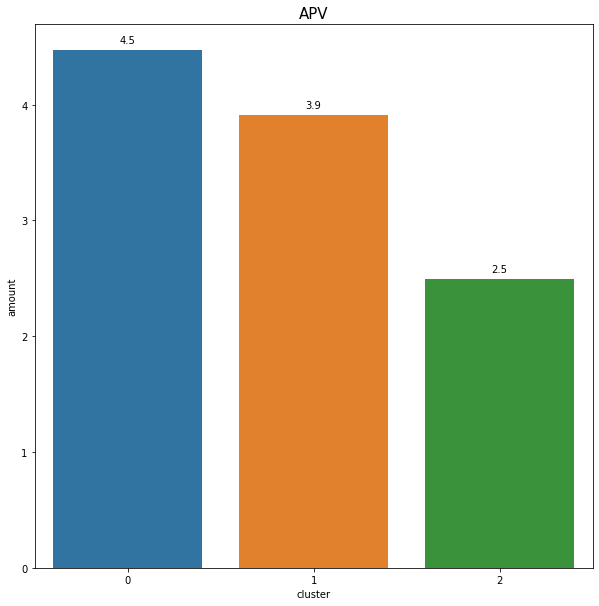

In [107]:
plt.figure(figsize=(10, 10))
mean_users_barplot = sns.barplot(mean_users.index, mean_users['APV'])

for bar in mean_users_barplot.patches:
    mean_users_barplot.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0,
                   textcoords = 'offset points')

plt.xlabel('cluster')
plt.ylabel('amount')
plt.title('APV', fontsize=15)
plt.show()

## Formulate and test statistical hypotheses

In [108]:
users['Cluster'].value_counts()

0    4314
1      23
2       1
Name: Cluster, dtype: int64

**findings:**

- with how the `cluster` spread, it's safe to say that each `cluster` is different based on how many user is in each `cluster`.
- i'd say there's no need to do a `proportions_ztest` because of the difference amount in each `cluster` 

## Conclusion

**findings:**

- it seems that there's always a dip in `revenue` every few months, most notably in `april`, `july`, and `november`
- eventhough there's up and downs in revenue. at the end of the data, it shows an increase in `revenue` if we compare it to the beginning of the data.
- `APV` reached it's peak at october, but then it dipped quite a lot after that. in the `revenue` graph, it also showed a similar pattern.
- we choose that `3` cluster should be best for this data
- `cluster 2` made the biggest quantity order.
- with the amount of quantity `cluster 2` made, it's no surprise that `cluster 2` also made the most `revenue` out of all clusters
- even though `cluster 2` made huge number in `revenue`. it's difficult to compare it to another cluster because there's only 1 user that belong to `cluster 2`.
- with `cluster 0` having the most user, it's no suprise that it will affect some of the numbers. `cluster 0` might have the lowest in `revenue` but it also has the highest in `APV`. so , to abandon or underestimate the effects those in `cluster 0` might not be the wisest choice. 
- with how the `cluster` spread, it's safe to say that each `cluster` is different based on how many user is in each `cluster`.
- i'd say there's no need to do a `proportions_ztest` because of the difference amount in each `cluster` 

**insights and recommendations:**

- find a strategy to attract users that eventually will belong to `cluster 2`
- find a way to minimalize the dip in `revenue` that happened every few months
- using some alredy-tried promotions such as:
    - Buy One Get One
    - Loyalty points
    - Steeply discounted item with a min purchase
- hopefully, more users will fit into `cluster 2` and hopefully this kind of promotions could at least halt the sudden dip in `revenue`

## Presentation

Link to slide: <https://docs.google.com/presentation/d/16rOmrcNyB2kM4tJf2h4n6Hm-TFcOuaW0EEb7pKd4qrA/edit?usp=sharing>

Link to tableau: <https://public.tableau.com/shared/D84NGQCD3?:display_count=n&:origin=viz_share_link>